In [ ]:
!pip install tensorflow keras

In [80]:
!pip install visualkeras


  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
  Using cached aggdraw-1.3.18.post0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (993 kB)


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import visualkeras

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [104]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10, 10)
(10000, 784) (10000, 10, 10)


In [71]:
model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


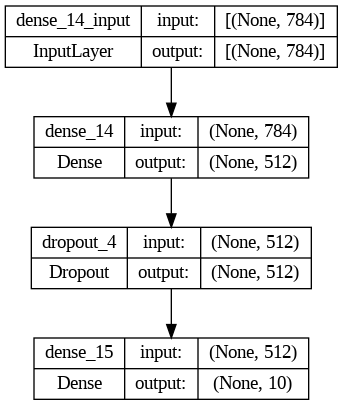

In [76]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [91]:
visualkeras.layered_view(model)

In [93]:
batch_size = 512
epochs=10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
118/118 [==============================] - 7s 56ms/step - loss: 0.3554 - accuracy: 0.8991 - val_loss: 0.3246 - val_accuracy: 0.9090
Epoch 2/10
118/118 [==============================] - 3s 27ms/step - loss: 0.3428 - accuracy: 0.9024 - val_loss: 0.3137 - val_accuracy: 0.9124
Epoch 3/10
118/118 [==============================] - 3s 27ms/step - loss: 0.3306 - accuracy: 0.9052 - val_loss: 0.3055 - val_accuracy: 0.9117
Epoch 4/10
118/118 [==============================] - 4s 30ms/step - loss: 0.3219 - accuracy: 0.9076 - val_loss: 0.2955 - val_accuracy: 0.9151
Epoch 5/10
118/118 [==============================] - 4s 33ms/step - loss: 0.3133 - accuracy: 0.9105 - val_loss: 0.2886 - val_accuracy: 0.9166
Epoch 6/10
118/118 [==============================] - 3s 27ms/step - loss: 0.3053 - accuracy: 0.9115 - val_loss: 0.2809 - val_accuracy: 0.9198
Epoch 7/10
118/118 [==============================] - 4s 37ms/step - loss: 0.2974 - accuracy: 0.9139 - val_loss: 0.2744 - val_accuracy: 0.9198

313/313 [==============================] - 1s 4ms/step - loss: 0.2580 - accuracy: 0.9241
Test accuracy: 0.9240999817848206


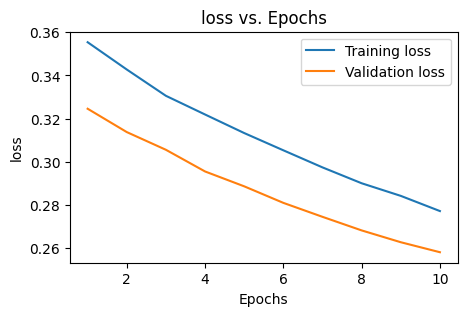

In [98]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
test_accuracy = history.history['val_accuracy']

epochs_range = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(5, 3))
plt.plot(epochs_range, history.history['loss'], label='Training loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss vs. Epochs')
plt.legend()
plt.show()

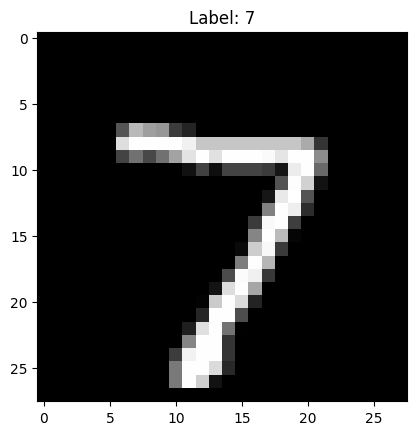

In [99]:
sample_image = x_test[0].reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {np.argmax(y_test[0])}')
plt.show()

In [100]:
sample_image = sample_image.reshape(1, 784)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction, axis=1)
print('Predicted class for the sample image:', predicted_class)

1/1 [==============================] - 0s 53ms/step
Predicted class for the sample image: [7]


313/313 [==============================] - 1s 4ms/step


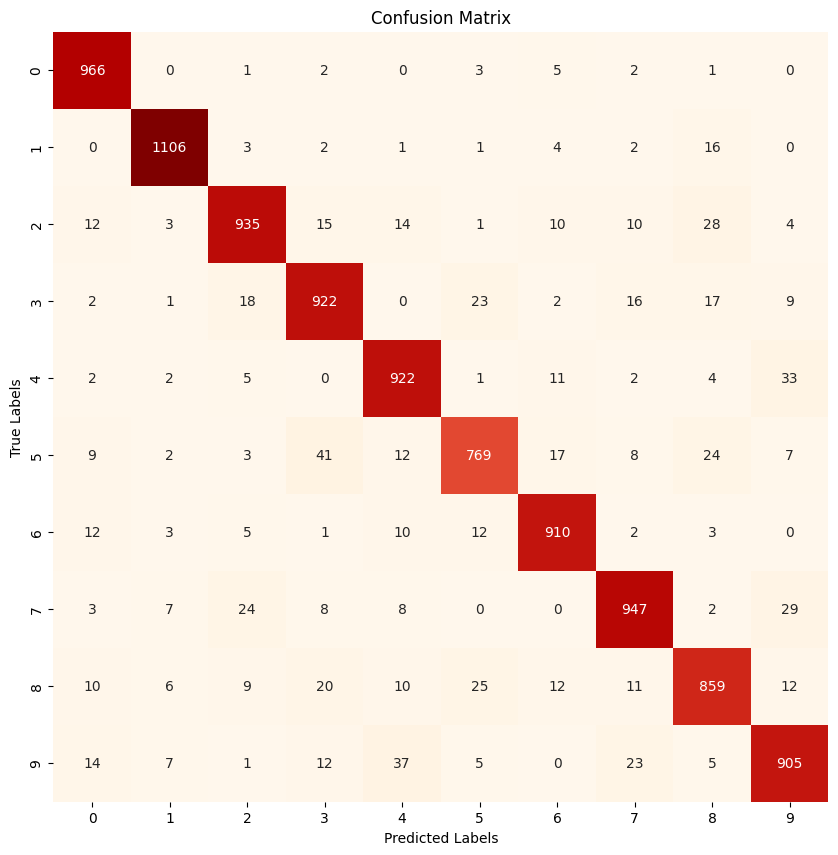

In [103]:
# Confusion Matrix
actual_classes = np.argmax(y_test, axis=1)
predicted_probabilities = model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
cm = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='OrRd', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()